# 2.3 Complex Machine Learning Models and Keras (Random Forest)

### 1. Importing Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from numpy import argmax

In [68]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [4]:
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/Machine Learning/ClimateWins'

In [11]:
# Import data
df = pd.read_csv(os.path.join(path, 'Data Sets','prepared_climate.csv'), index_col = False)
df

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06      

In [12]:
#Import pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets','Pleasant_Weather.csv'))
pleasantweather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

### 2. Data Wrangling

In [13]:
# Reduce observations dataset to 2010's

dfdecade = df[df['DATE'].astype(str).str.startswith('201')] 
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [15]:
# Reduce pleasant weather dataset to 2010's
pleasant_decade = pleasantweather[pleasantweather['DATE'].astype(str).str.startswith('201')]
pleasant_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [16]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [17]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [18]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
LJUBLJANA: 32868 entries
HEATHROW: 32868 entries
VALENTIA: 32868 entries
SONNBLICK: 32868 entries
MAASTRICHT: 32868 entries
MADRID: 32868 entries
STOCKHOLM: 32868 entries
DUSSELDORF: 32868 entries
DEBILT: 32868 entries
BASEL: 32868 entries
BUDAPEST: 32868 entries
KASSEL: 32868 entries
BELGRADE: 32868 entries
OSLO: 32868 entries
MUNCHENB: 32868 entries


In [19]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

/var/folders/y9/8n80fmjn4t70621k4d0spkzh0000gn/T/ipykernel_21307/1265420931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)


In [20]:
dfdecade.shape 

(3652, 135)

In [21]:
pleasant_decade.drop(columns = 'DATE', inplace = True)

/var/folders/y9/8n80fmjn4t70621k4d0spkzh0000gn/T/ipykernel_21307/2740976054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pleasant_decade.drop(columns = 'DATE', inplace = True)


In [22]:
pleasant_decade.shape

(3652, 15)

### 3. Reshaping for modeling

In [23]:
X = dfdecade

In [24]:
y = pleasant_decade

In [25]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [26]:
X.shape

(3652, 135)

In [27]:
y.shape

(3652, 15)

### 4. Data Split 

In [28]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 5. Random Forest Model

In [32]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [33]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5761226725082147


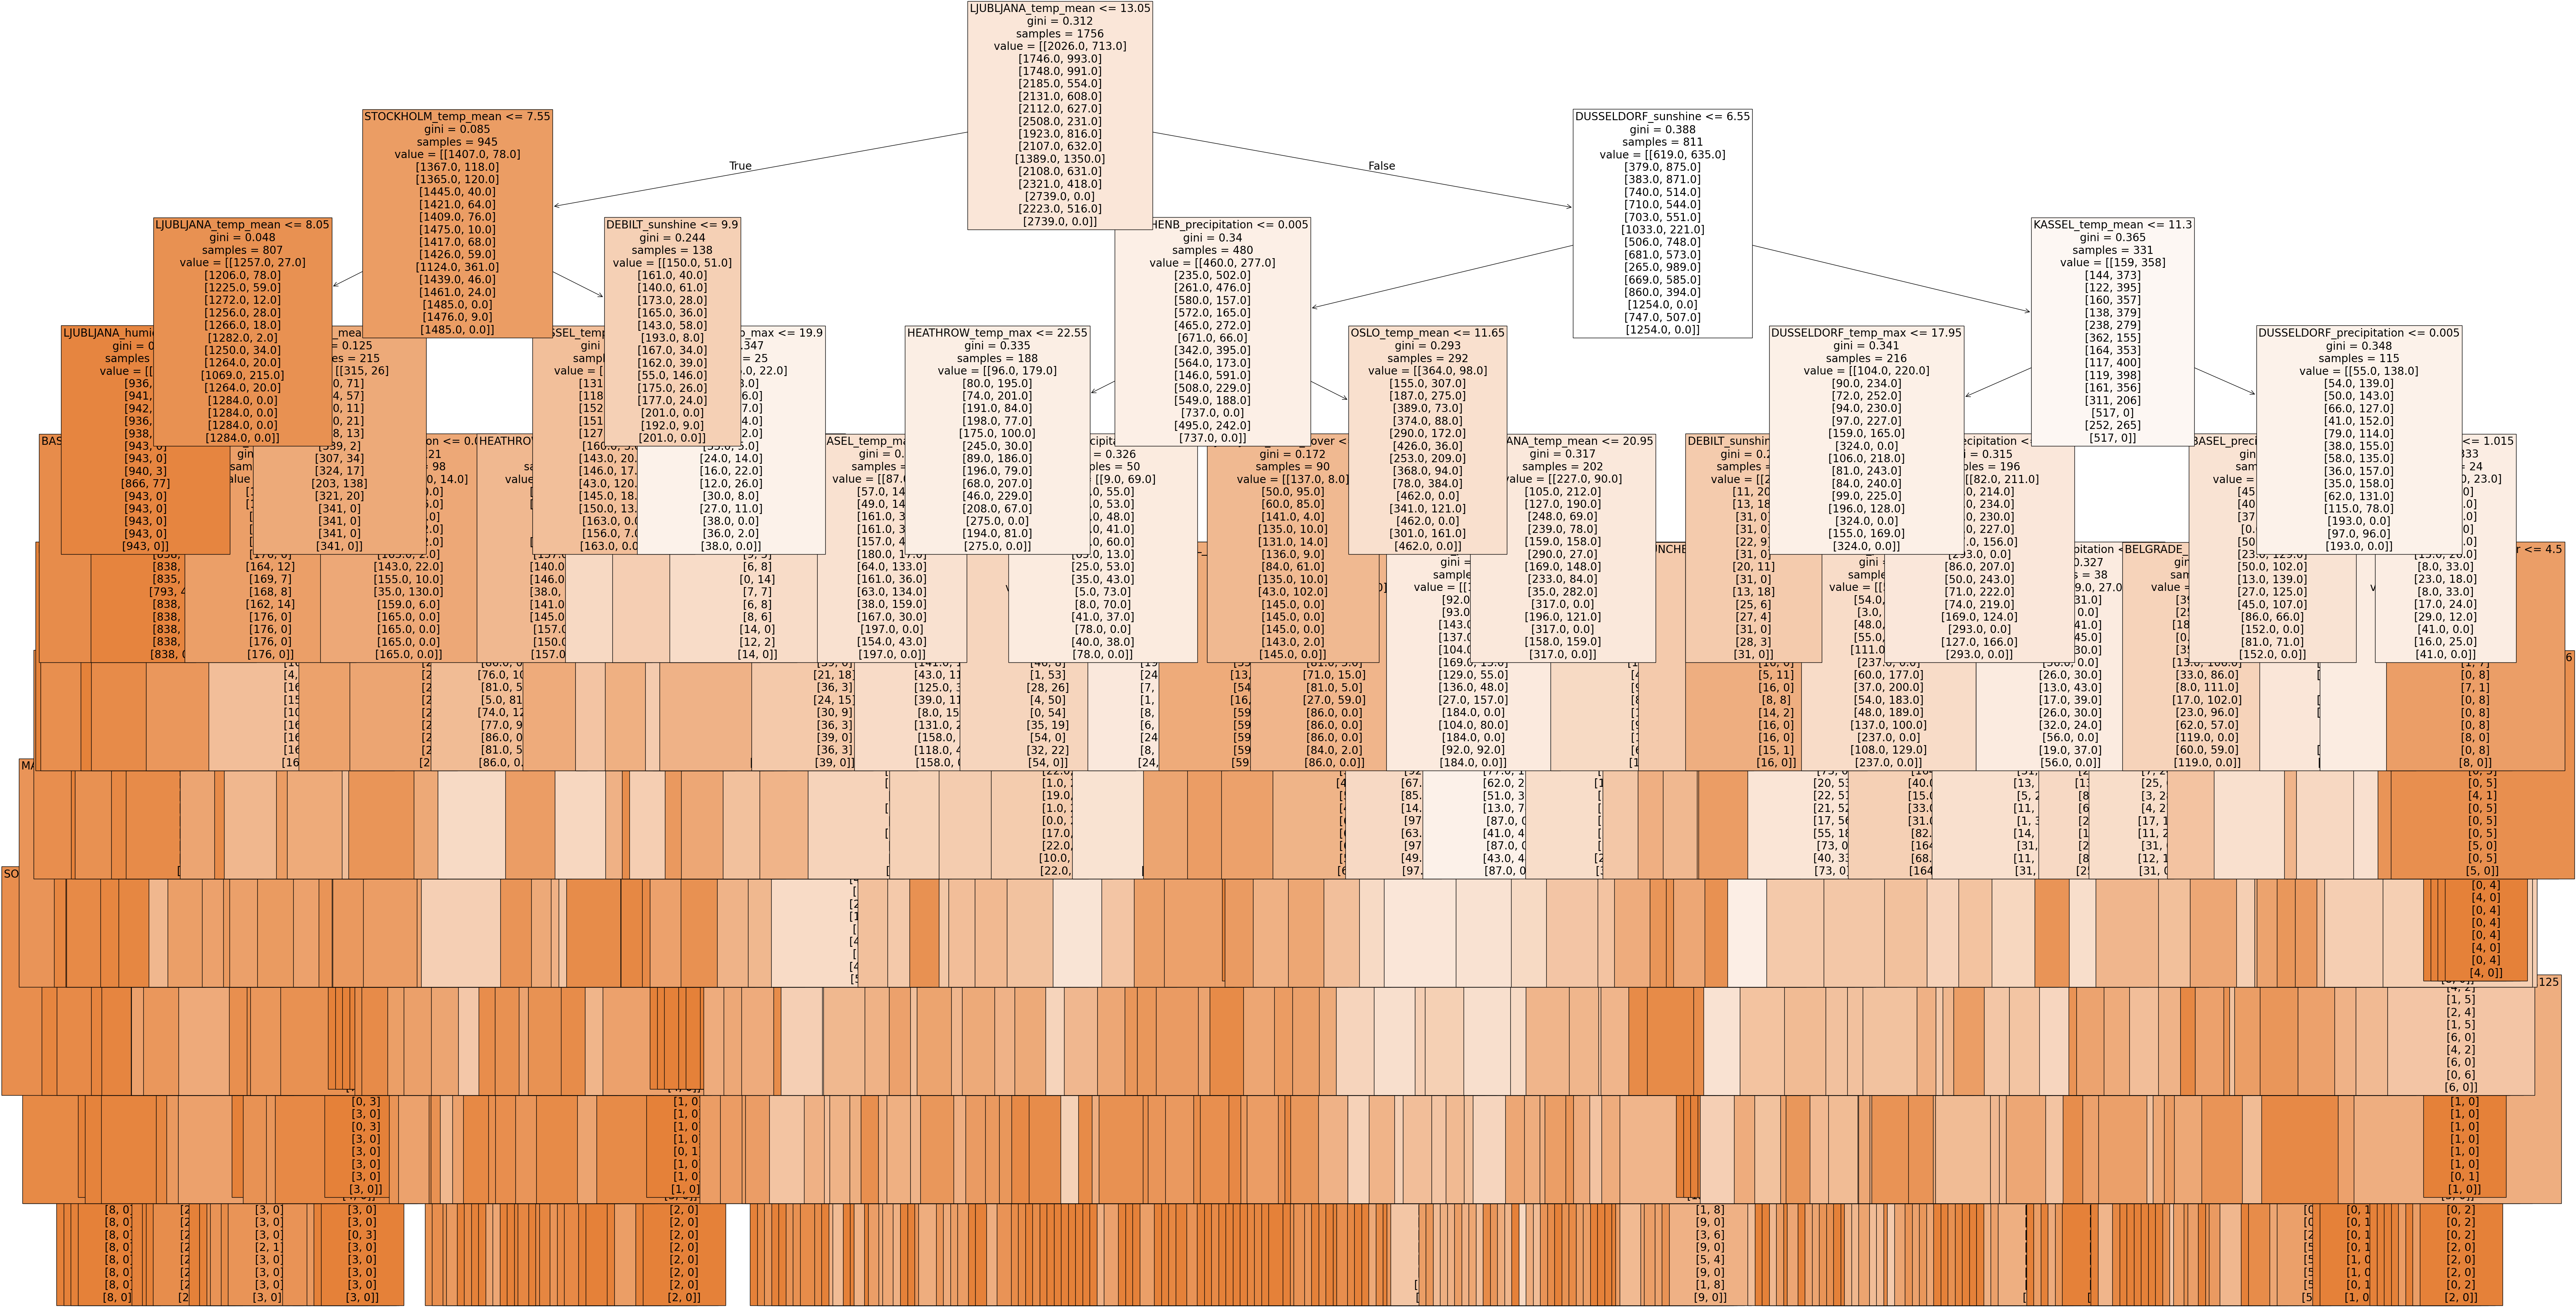

In [34]:
# Plot random forest (2010s)
rf = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, feature_names=dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [37]:
rf.savefig(os.path.join(path,'random_forest_2010s.png'), bbox_inches='tight')

### 6. Uncovering Feature Importances

In [38]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([3.23635935e-03, 2.74631957e-03, 2.57410523e-03, 2.65144247e-03,
       2.02155631e-02, 1.08331494e-02, 3.59117966e-02, 2.11644816e-03,
       3.87552259e-02, 3.38226819e-03, 2.75792246e-03, 3.61198403e-03,
       2.40141775e-03, 1.75945315e-02, 2.52277703e-03, 6.00639191e-03,
       3.06183398e-03, 5.24636205e-03, 3.27700518e-04, 0.00000000e+00,
       0.00000000e+00, 9.03321230e-04, 1.54808075e-02, 1.10491345e-03,
       1.47922090e-02, 1.40759876e-02, 3.02268796e-02, 2.40079394e-03,
       2.24451683e-03, 3.70539819e-03, 3.73655774e-03, 1.44239003e-02,
       4.73020653e-03, 2.71957873e-02, 2.20376493e-03, 2.76824508e-02,
       2.53910316e-03, 2.94975013e-03, 3.99587128e-03, 3.13811382e-03,
       2.01926425e-02, 5.19296252e-03, 2.77773291e-02, 2.05770758e-03,
       2.67652039e-02, 2.11464033e-03, 3.97563314e-03, 3.19086171e-03,
       3.61179389e-03, 9.36611561e-03, 3.81216038e-03, 1.08120544e-02,
       2.49243645e-03, 1.54934497e-02, 3.27907966e-03, 2.11331713e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[3.23635935e-03, 2.74631957e-03, 2.57410523e-03, 2.65144247e-03,
         2.02155631e-02, 1.08331494e-02, 3.59117966e-02, 2.11644816e-03,
         3.87552259e-02],
        [3.38226819e-03, 2.75792246e-03, 3.61198403e-03, 2.40141775e-03,
         1.75945315e-02, 2.52277703e-03, 6.00639191e-03, 3.06183398e-03,
         5.24636205e-03],
        [3.27700518e-04, 0.00000000e+00, 0.00000000e+00, 9.03321230e-04,
         1.54808075e-02, 1.10491345e-03, 1.47922090e-02, 1.40759876e-02,
         3.02268796e-02],
        [2.40079394e-03, 2.24451683e-03, 3.70539819e-03, 3.73655774e-03,
         1.44239003e-02, 4.73020653e-03, 2.71957873e-02, 2.20376493e-03,
         2.76824508e-02],
        [2.53910316e-03, 2.94975013e-03, 3.99587128e-03, 3.13811382e-03,
         2.01926425e-02, 5.19296252e-03, 2.77773291e-02, 2.05770758e-03,
         2.67652039e-02],
        [2.11464033e-03, 3.97563314e-03, 3.19086171e-03, 3.61179389e-03,
         9.36611561e-03, 3.81216038e-03, 1.08120544e-02, 2.49243645

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11904041, 0.04658549, 0.07691182, 0.08832338, 0.09460868,
       0.05486915, 0.02922783, 0.07630499, 0.12225966, 0.0656542 ,
       0.09417901, 0.05428743, 0.02380686, 0.05077921, 0.00316187])

In [41]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [42]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DEBILT        0.122260
LJUBLJANA     0.119040
MAASTRICHT    0.094609
BUDAPEST      0.094179
SONNBLICK     0.088323
VALENTIA      0.076912
DUSSELDORF    0.076305
BASEL         0.065654
MADRID        0.054869
KASSEL        0.054287
OSLO          0.050779
HEATHROW      0.046585
STOCKHOLM     0.029228
BELGRADE      0.023807
MUNCHENB      0.003162
dtype: float64

In [43]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['LJUBLJANA', 'HEATHROW', 'VALENTIA', 'SONNBLICK', 'MAASTRICHT', 'MADRID', 'STOCKHOLM', 'DUSSELDORF', 'DEBILT', 'BASEL', 'BUDAPEST', 'KASSEL', 'BELGRADE', 'OSLO', 'MUNCHENB']


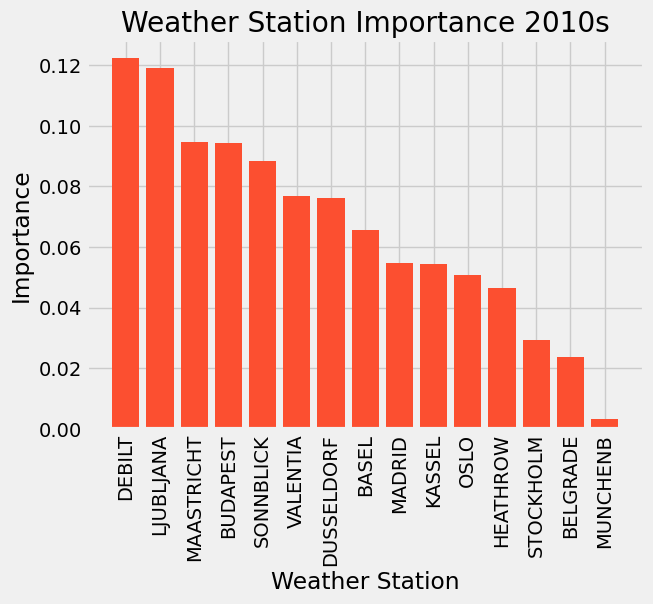

In [45]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.savefig(os.path.join(path, '2010s_feauture_importances.png'), bbox_inches='tight')

plt.show()

### 8. Modeling the 3 Most Influential Weather Stations

#### DEBILT

In [94]:
# Filter weather dataset to only include Debilt
df_debilt = df[df.columns[df.columns.astype(str).str.startswith('DEBILT')]]


df_debilt

DEBILT_cloud_cover  DEBILT_humidity  DEBILT_pressure  \
0                       7             0.85           1.0032   
1                       8             0.90           1.0056   
2                       6             0.92           1.0165   
3                       8             0.95           1.0265   
4                       6             0.90           1.0243   
...                   ...              ...              ...   
22945                   8             0.84           1.0190   
22946                   8             0.84           1.0177   
22947                   8             0.86           1.0174   
22948                   8             0.87           1.0174   
22949                   8             0.89           1.0156   

       DEBILT_global_radiation  DEBILT_precipitation  DEBILT_sunshine  \
0                         0.07                  0.25              0.0   
1                         0.14                  0.06              0.1   
2                         0.28                  0.01              3.0   
3                         0.08                  0.09              0.0   
4                         0.04                  0.39              0.0   
...                        ...                   ...              ...   
22945                     1.13                  0.22              2.8   
22946                     1.13                  0.22              3.5   
22947                     1.13                  0.22              3.3   
22948                     1.13                  0.22              6.0   
22949                     1.13                  0.22              0.7   

       DEBILT_temp_mean  DEBILT_temp_min  DEBILT_temp_max  
0                   9.3              7.4             11.0  
1                   7.7              6.4              8.3  
2                   6.8              4.6              9.9  
3                   6.7              3.6             10.1  
4                   8.0              2.4             11.2  
...                 ...              ...              ...  
22945              15.7             12.8             19.4  
22946              16.0             10.3             20.5  
22947              15.8              9.3             21.1  
22948              14.4             10.3             20.2  
22949              12.8              6.7             16.2  

[22950 rows x 9 columns]

In [95]:
# Filter pleasant dataset to only include Debilt
pleasant_deb = pleasantweather[pleasantweather.columns[pleasantweather.columns.astype(str).str.startswith('DEBILT')]]

pleasant_deb

DEBILT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
22945                        0
22946                        0
22947                        0
22948                        0
22949                        0

[22950 rows x 1 columns]

In [96]:
# Create matrices
y2 = pleasant_deb.max(axis=1)

y2.shape

(22950,)

In [97]:
# Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)


y2.shape

(22950,)

In [98]:
# Create X matrix
X2 = df_debilt.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [99]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [100]:
X.shape

(22950, 9)

In [101]:
y.shape

(22950,)

In [102]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [103]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [104]:
X_train

array([[  6.    ,   0.66  ,   1.0154, ...,  16.3   ,   7.5   ,  21.8   ],
       [  6.    ,   0.82  ,   1.0163, ...,  -2.5   ,  -8.    ,   0.7   ],
       [  3.    ,   0.89  ,   1.011 , ...,  -4.9   , -10.    ,  -2.1   ],
       ...,
       [  8.    ,   0.96  ,   1.0053, ...,   8.3   ,   7.    ,   9.1   ],
       [  6.    ,   0.79  ,   1.0113, ...,  10.7   ,   7.8   ,  14.8   ],
       [  2.    ,   0.78  ,   1.0248, ...,   6.3   ,   0.    ,  12.6   ]])

In [105]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [106]:
X_test

array([[ 5.    ,  0.81  ,  1.0156, ..., 12.6   ,  8.4   , 17.8   ],
       [ 7.    ,  0.7   ,  1.0067, ...,  1.4   ,  0.    ,  3.6   ],
       [ 7.    ,  0.86  ,  1.0058, ..., 16.7   , 14.1   , 18.    ],
       ...,
       [ 1.    ,  0.83  ,  1.0126, ..., 10.8   ,  4.6   , 20.    ],
       [ 5.    ,  0.82  ,  1.0257, ...,  7.7   ,  3.9   , 12.3   ],
       [ 7.    ,  0.89  ,  1.0208, ..., 10.3   ,  6.9   , 12.9   ]])

In [107]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

##### Random Forest Model

In [108]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [109]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


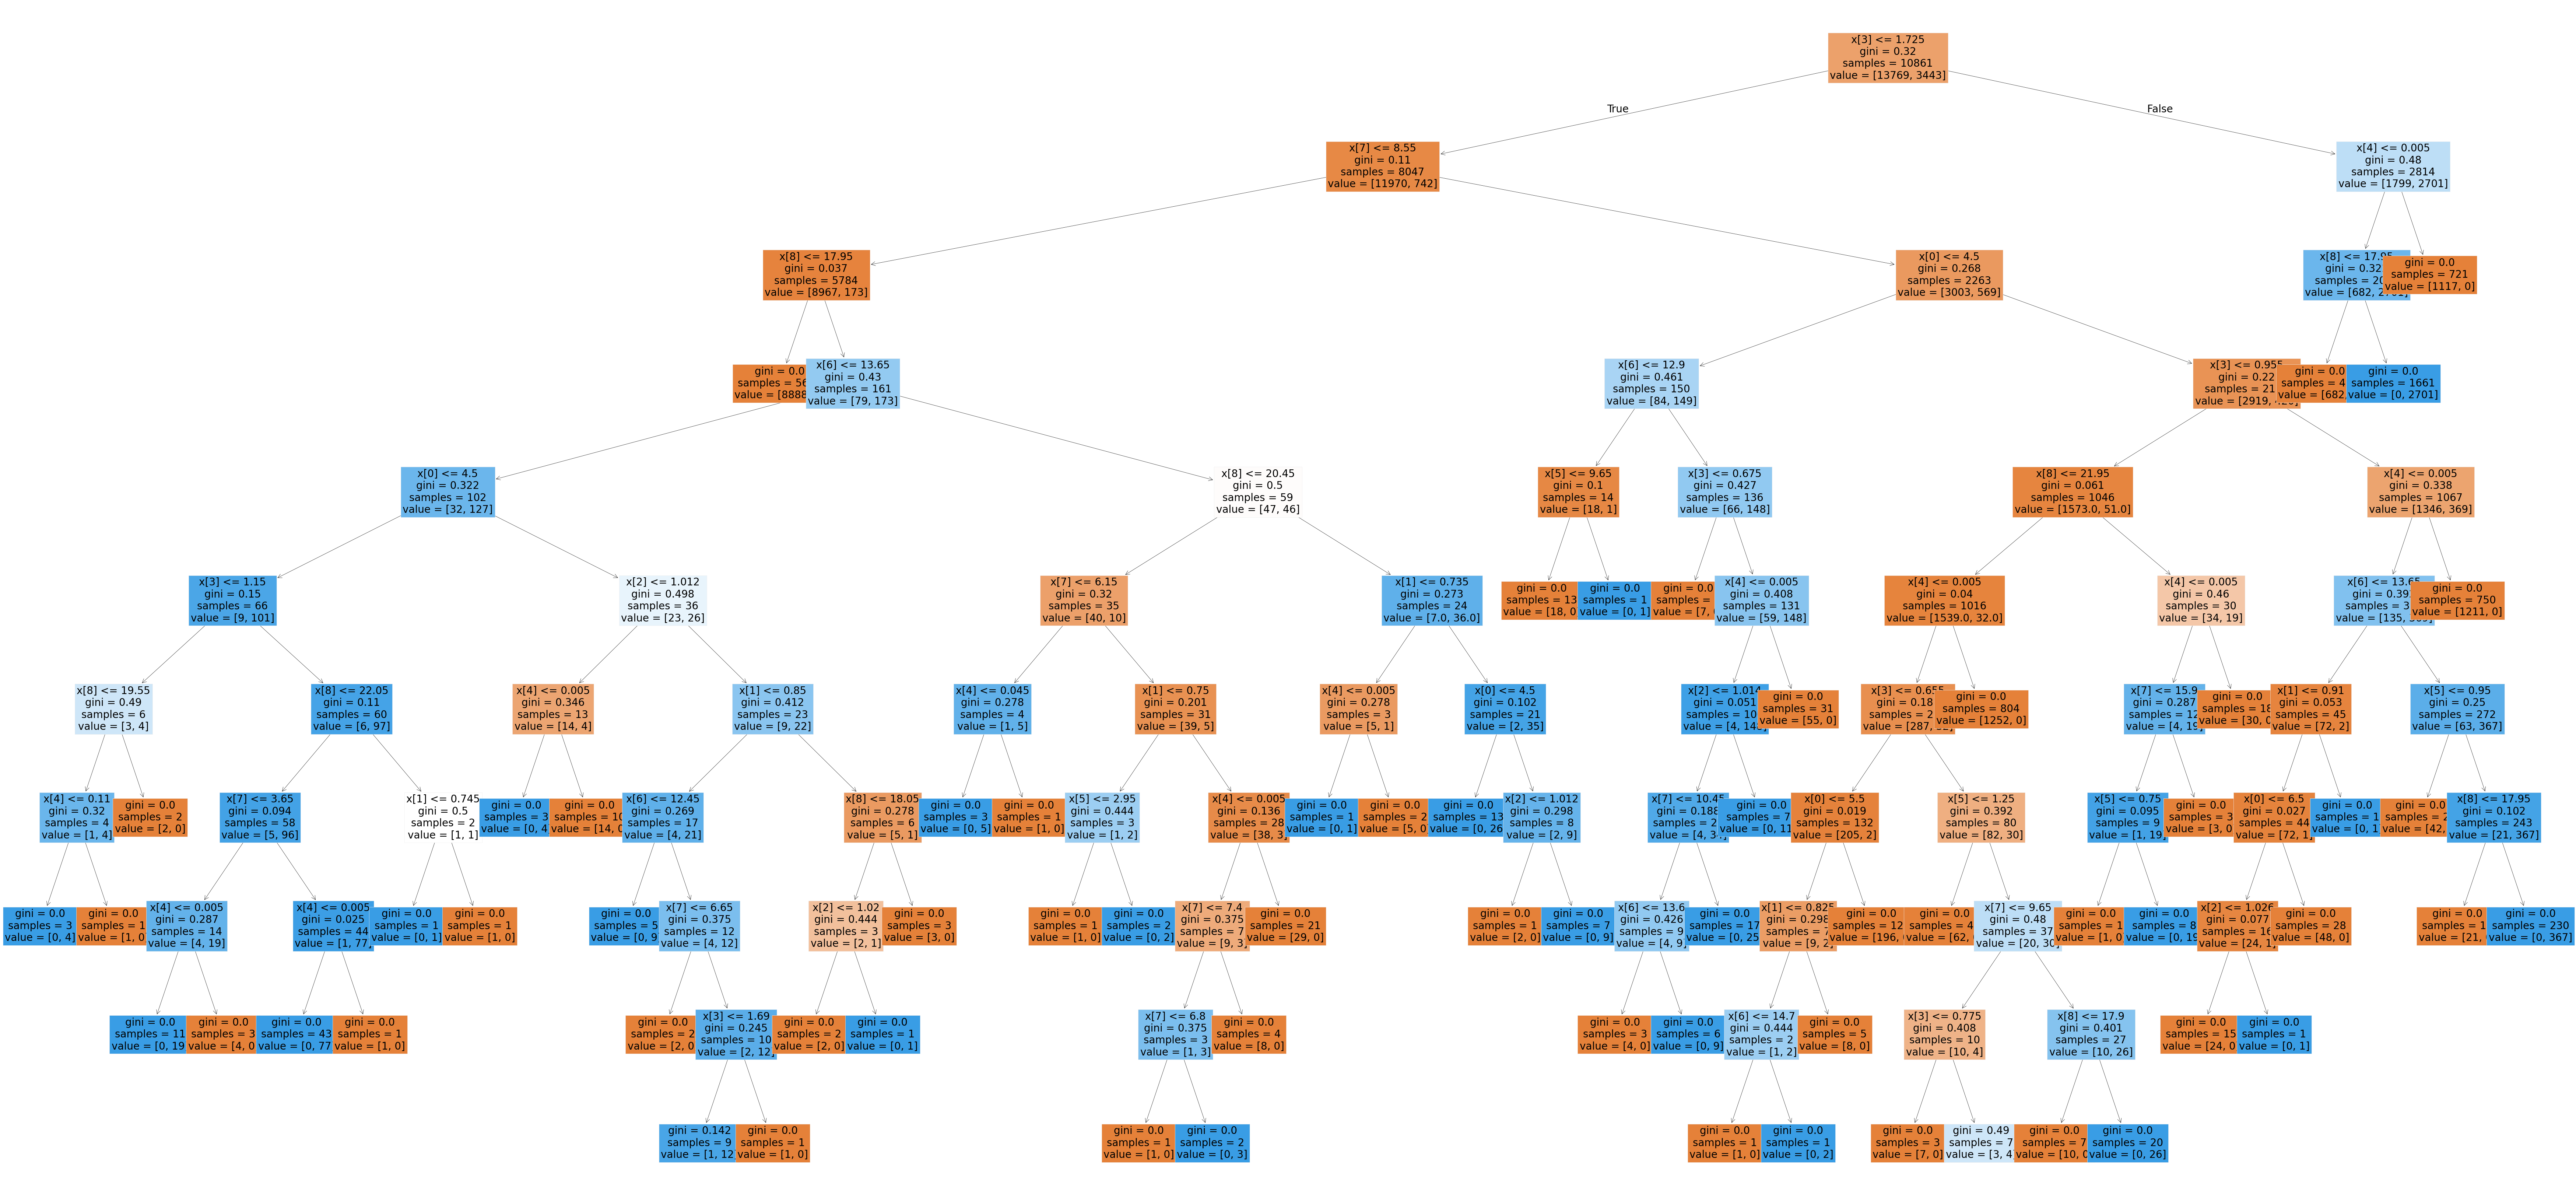

In [110]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True)
plt.show()

In [111]:
fig.savefig(os.path.join(path,'random_forest_debilt.png'),bbox_inches='tight')

##### Uncovering Feature Importances

In [112]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.0243157 , 0.01423423, 0.01388095, 0.10083298, 0.32144286,
       0.06753123, 0.12459215, 0.0254738 , 0.3076961 ])

In [113]:
# Retrieve feature importances from the trained model
debilt_importance = clf.feature_importances_
print("Feature Importances:", debilt_importance)
print(debit_importance.shape)

Feature Importances: [0.0243157  0.01423423 0.01388095 0.10083298 0.32144286 0.06753123
 0.12459215 0.0254738  0.3076961 ]
(9,)


In [114]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [115]:
# Create a dataframe to associate observation measurements with their importances
debilt_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': debilt_importance
})

In [116]:
# Sort by importance for chart readability
debilt_importance = debilt_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(debilt_importance)

Feature Importance:
        Measurement  Importance
4     precipitation    0.321443
8          temp_max    0.307696
6         temp_mean    0.124592
3  global_radiation    0.100833
5          sunshine    0.067531
7          temp_min    0.025474
0       cloud_cover    0.024316
1          humidity    0.014234
2          pressure    0.013881


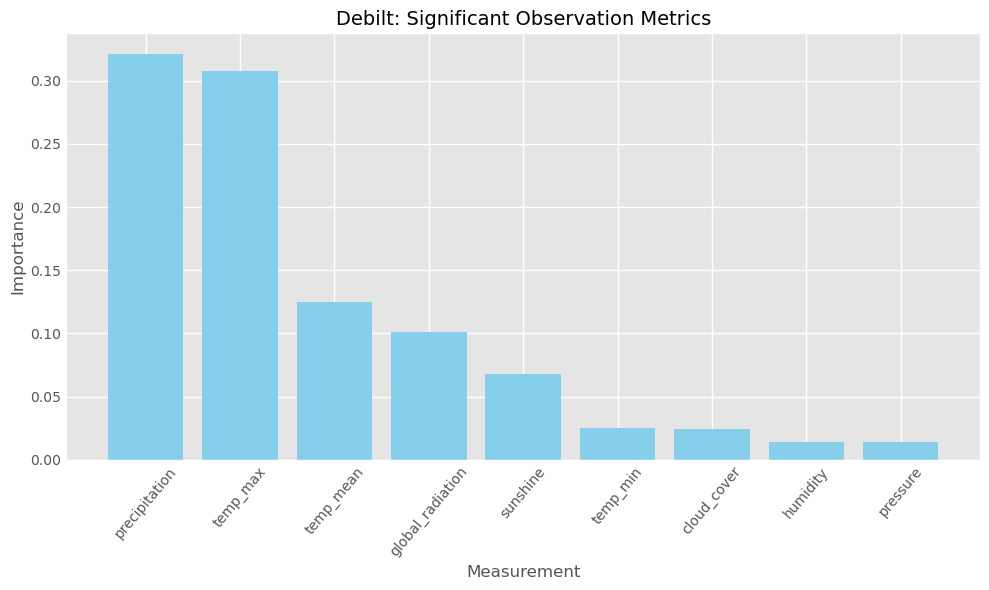

In [117]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(debilt_importance['Measurement'], debilt_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Debilt: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

The most important features for Debilt are: precipitation, temp_max and temp_mean.

#### LJUBLJANA

In [118]:
# Filter weather dataset to only include Ljubljana
df_ljubljana = df[df.columns[df.columns.astype(str).str.startswith('LJUBLJANA')]]


df_ljubljana

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                          8                1.00              1.0173   
1                          6                0.94              1.0173   
2                          8                0.96              1.0173   
3                          6                0.94              1.0173   
4                          7                0.94              1.0173   
...                      ...                 ...                 ...   
22945                      4                0.80              1.0289   
22946                      3                0.82              1.0291   
22947                      3                0.81              1.0270   
22948                      3                0.77              1.0238   
22949                      3                0.77              1.0114   

       LJUBLJANA_global_radiation  LJUBLJANA_precipitation  \
0                            0.20                     0.00   
1                            0.56                     0.13   
2                            0.20                     0.12   
3                            0.49                     0.00   
4                            0.20                     0.00   
...                           ...                      ...   
22945                        1.35                     0.37   
22946                        1.35                     0.37   
22947                        1.35                     0.37   
22948                        1.35                     0.37   
22949                        1.35                     0.37   

       LJUBLJANA_sunshine  LJUBLJANA_temp_mean  LJUBLJANA_temp_min  \
0                     0.0                 -0.6                -1.9   
1                     3.2                  2.1                -1.3   
2                     0.0                  4.6                 0.9   
3                     2.2                  3.2                 1.0   
4                     0.0                  3.6                 0.4   
...                   ...                  ...                 ...   
22945                 5.9                 14.7                12.1   
22946                 4.5                 12.9                 9.8   
22947                 5.1                 13.2                10.2   
22948                 5.7                 14.0                10.0   
22949                 6.3                 13.6                 8.8   

       LJUBLJANA_temp_max  
0                     0.5  
1                     5.5  
2                     6.3  
3                     7.0  
4                     4.8  
...                   ...  
22945                21.1  
22946                19.8  
22947                20.7  
22948                23.1  
22949                23.4  

[22950 rows x 9 columns]

In [119]:
# Filter pleasant dataset to only include Ljubljana
pleasant_lju = pleasantweather[pleasantweather.columns[pleasantweather.columns.astype(str).str.startswith('LJUBLJANA')]]

pleasant_lju

LJUBLJANA_pleasant_weather
0                               0
1                               0
2                               0
3                               0
4                               0
...                           ...
22945                           0
22946                           0
22947                           0
22948                           0
22949                           0

[22950 rows x 1 columns]

In [120]:
# Create matrices
y3 = pleasant_lju.max(axis=1)

y3.shape

(22950,)

In [121]:
# Ensure y has the correct shape
y3 = y3.to_numpy().reshape(-1)


y3.shape

(22950,)

In [122]:
# Create X matrix
X3 = df_ljubljana.to_numpy()

# Check shapes of the matrices
print(X3.shape)
print(y3.shape)

(22950, 9)
(22950,)


In [123]:
# Turn X2 and y2 from df to arrays

X = np.array(X3)
y = np.array(y3)

In [124]:
X.shape

(22950, 9)

In [125]:
y.shape

(22950,)

In [126]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [127]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [128]:
X_train

array([[ 6.    ,  0.76  ,  1.0128, ..., 19.2   , 14.2   , 26.8   ],
       [ 2.    ,  0.83  ,  1.02  , ..., -4.4   , -8.2   , -1.3   ],
       [ 8.    ,  0.95  ,  1.0121, ...,  0.6   , -0.6   ,  1.2   ],
       ...,
       [ 8.    ,  0.96  ,  1.0172, ...,  8.9   ,  6.7   , 12.    ],
       [ 6.    ,  0.74  ,  1.0122, ..., 15.8   , 13.4   , 21.    ],
       [ 6.    ,  0.73  ,  1.0168, ..., 11.9   ,  5.4   , 19.8   ]])

In [129]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
X_test

array([[ 8.    ,  0.88  ,  1.0149, ..., 18.5   , 15.    , 24.8   ],
       [ 7.    ,  0.7   ,  1.0227, ..., -1.    , -4.8   ,  2.    ],
       [ 6.    ,  0.88  ,  1.0108, ..., 18.7   , 15.1   , 21.4   ],
       ...,
       [ 2.    ,  0.86  ,  1.0203, ...,  8.5   ,  4.    , 17.8   ],
       [ 2.    ,  0.57  ,  1.0222, ..., 10.2   ,  3.    , 18.2   ],
       [ 1.    ,  0.49  ,  1.0142, ..., 24.3   , 16.5   , 31.7   ]])

In [131]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

##### Random Forest Model

In [132]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [133]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


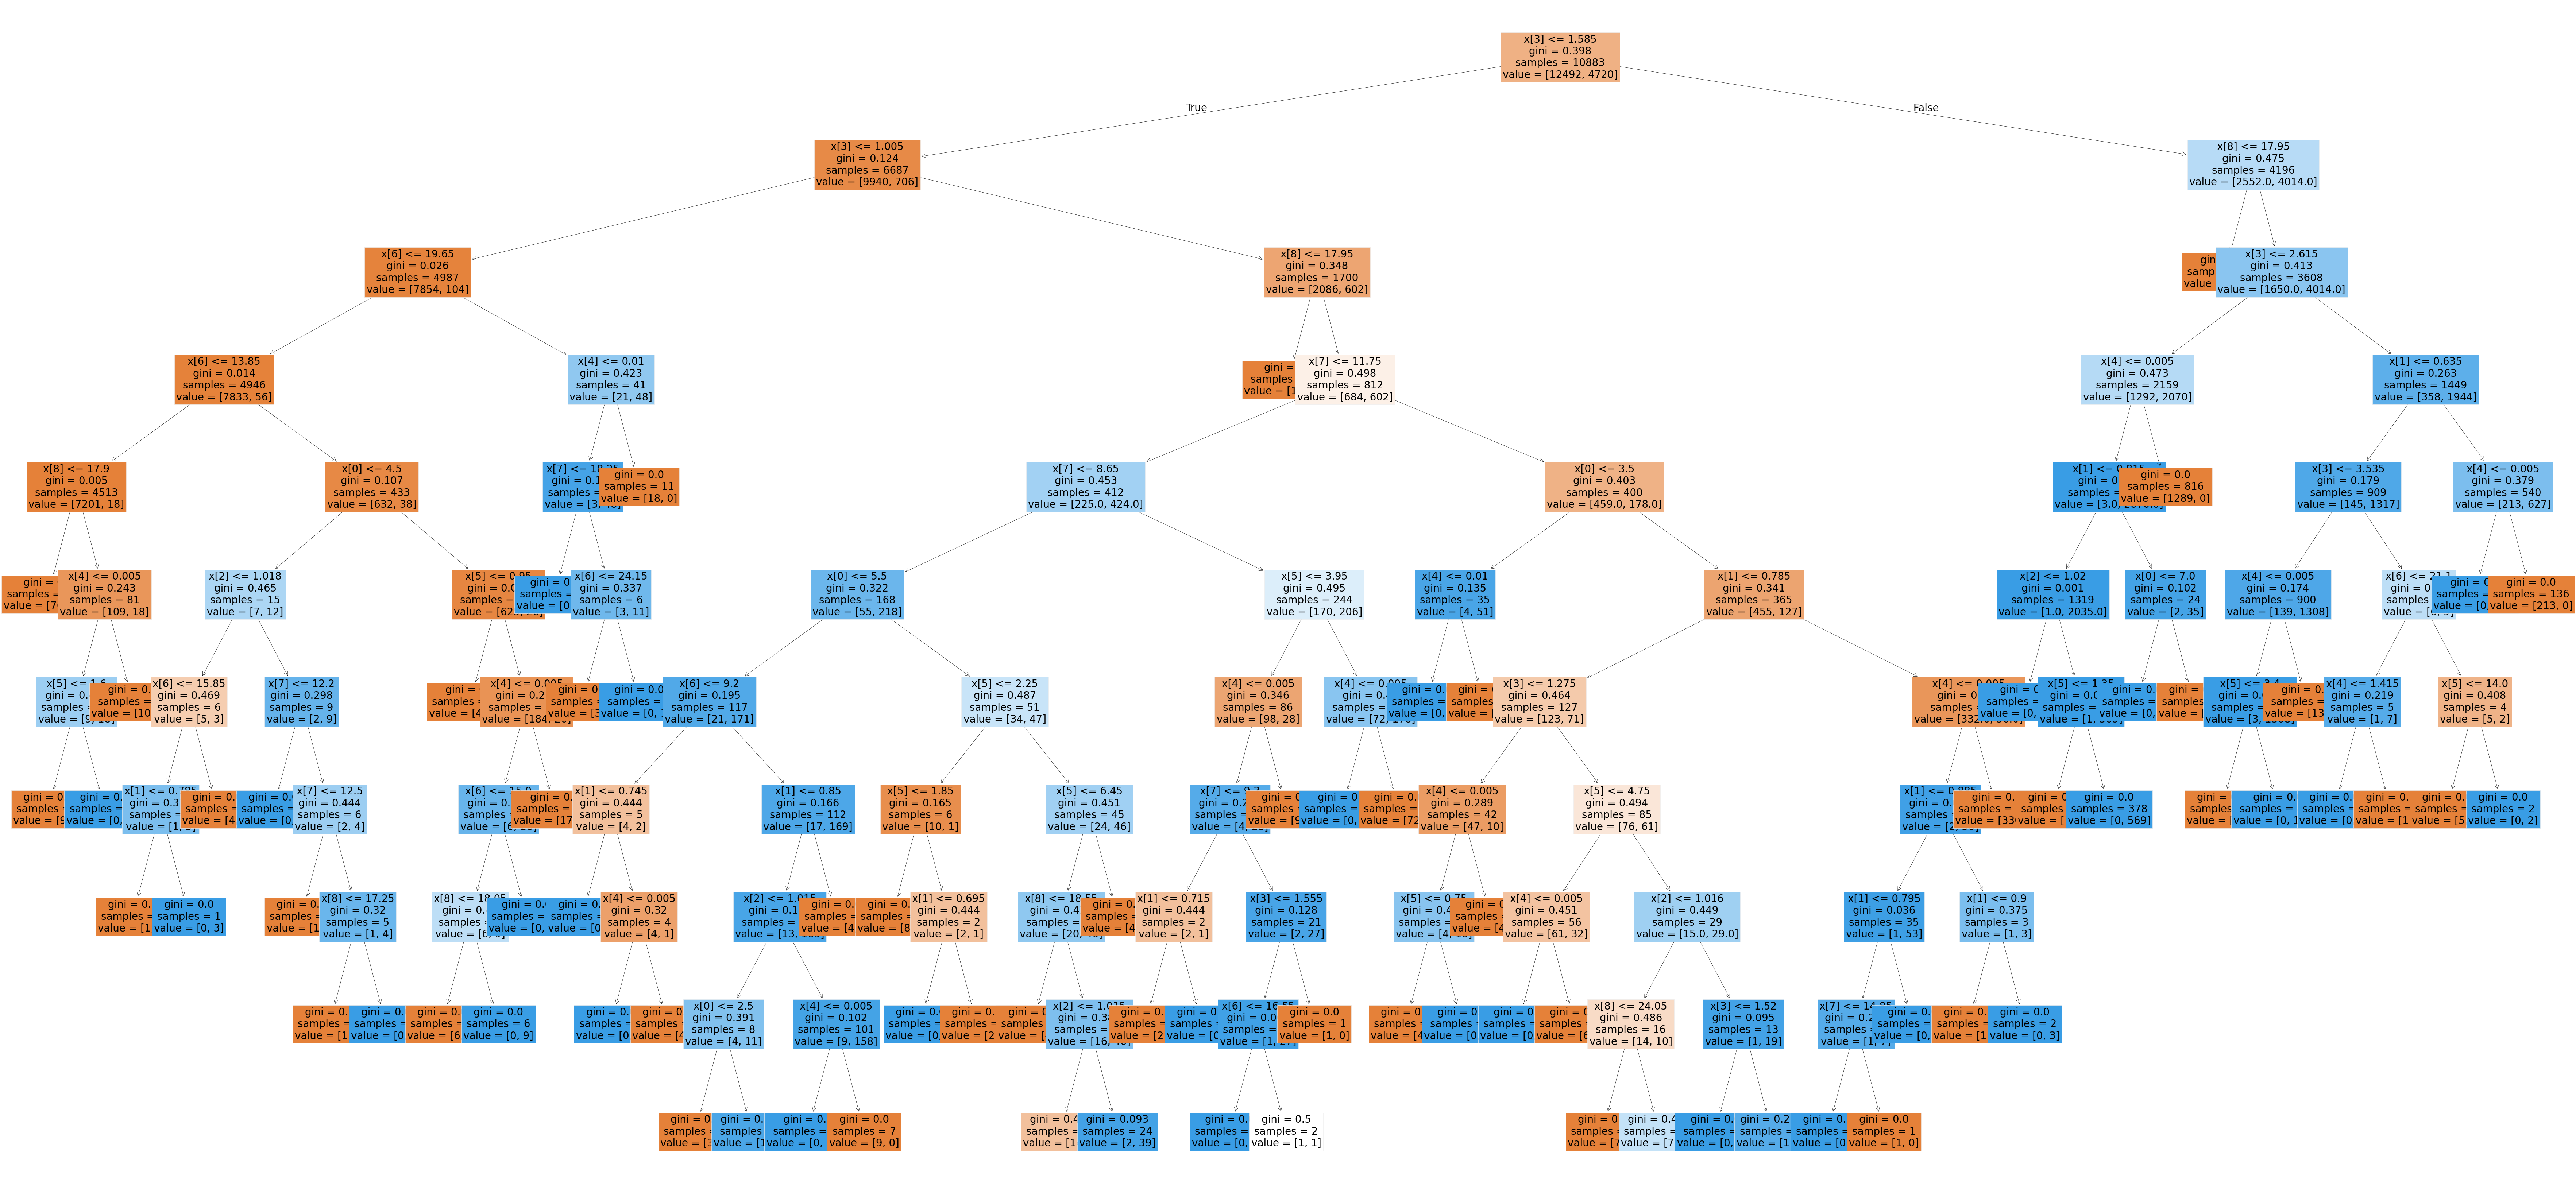

In [134]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True)
plt.show()

In [135]:
fig.savefig(os.path.join(path,'random_forest_ljubljana.png'),bbox_inches='tight')

##### Uncovering Feature Importances

In [136]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04466436, 0.02043013, 0.00881908, 0.07499507, 0.36064973,
       0.09148481, 0.12472797, 0.01482591, 0.25940294])

In [137]:
# Retrieve feature importances from the trained model
lju_importance = clf.feature_importances_
print("Feature Importances:", lju_importance)
print(lju_importance.shape)

Feature Importances: [0.04466436 0.02043013 0.00881908 0.07499507 0.36064973 0.09148481
 0.12472797 0.01482591 0.25940294]
(9,)


In [138]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [139]:
# Create a dataframe to associate observation measurements with their importances
lju_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': lju_importance
})

In [140]:
# Sort by importance for chart readability
lju_importance = lju_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(lju_importance)

Feature Importance:
        Measurement  Importance
4     precipitation    0.360650
8          temp_max    0.259403
6         temp_mean    0.124728
5          sunshine    0.091485
3  global_radiation    0.074995
0       cloud_cover    0.044664
1          humidity    0.020430
7          temp_min    0.014826
2          pressure    0.008819


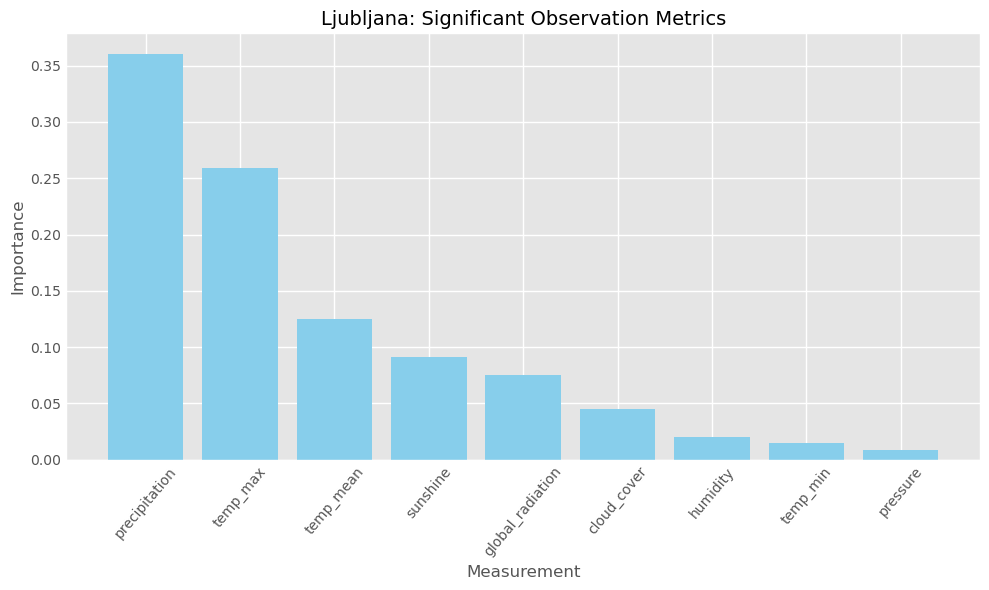

In [142]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(lju_importance['Measurement'], lju_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

The most important features for Debilt are: precipitation, temp_max and temp_mean.

##### MAASTRICHT

In [143]:
# Filter weather dataset to only include Ljubljana
df_maastricht = df[df.columns[df.columns.astype(str).str.startswith('MAASTRICHT')]]


df_maastricht

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [144]:
# Filter pleasant dataset to only include Ljubljana
pleasant_ma = pleasantweather[pleasantweather.columns[pleasantweather.columns.astype(str).str.startswith('MAASTRICHT')]]

pleasant_ma

MAASTRICHT_pleasant_weather
0                                0
1                                0
2                                0
3                                0
4                                0
...                            ...
22945                            0
22946                            0
22947                            0
22948                            0
22949                            0

[22950 rows x 1 columns]

In [145]:
# Create matrices
y4 = pleasant_ma.max(axis=1)

y4.shape

(22950,)

In [146]:
# Ensure y has the correct shape
y4 = y4.to_numpy().reshape(-1)


y4.shape

(22950,)

In [147]:
# Create X matrix
X4 = df_maastricht.to_numpy()

# Check shapes of the matrices
print(X4.shape)
print(y4.shape)

(22950, 9)
(22950,)


In [148]:
# Turn X2 and y2 from df to arrays

X = np.array(X4)
y = np.array(y4)

In [149]:
X.shape

(22950, 9)

In [150]:
y.shape

(22950,)

In [151]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [152]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [153]:
X_train

array([[  3.    ,   0.71  ,   1.0144, ...,  17.7   ,  11.1   ,  23.    ],
       [  4.    ,   0.76  ,   1.0171, ...,  -3.8   ,  -8.    ,   0.4   ],
       [  5.    ,   0.92  ,   1.0108, ...,  -6.1   , -11.    ,  -3.1   ],
       ...,
       [  7.    ,   0.88  ,   1.0096, ...,   7.3   ,   3.5   ,   9.1   ],
       [  6.    ,   0.77  ,   1.0134, ...,  10.4   ,   8.4   ,  14.1   ],
       [  1.    ,   0.69  ,   1.0245, ...,   7.6   ,   2.8   ,  12.6   ]])

In [154]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [155]:
X_test

array([[ 4.    ,  0.8   ,  1.0166, ..., 12.2   ,  7.9   , 18.2   ],
       [ 8.    ,  0.73  ,  1.0063, ...,  2.7   ,  0.5   ,  5.6   ],
       [ 6.    ,  0.86  ,  1.0083, ..., 16.9   , 15.3   , 18.5   ],
       ...,
       [ 1.    ,  0.86  ,  1.0121, ..., 11.5   ,  5.9   , 19.4   ],
       [ 7.    ,  0.82  ,  1.0266, ...,  7.    ,  5.3   ,  9.8   ],
       [ 7.    ,  0.86  ,  1.0207, ..., 11.1   ,  7.    , 13.5   ]])

In [156]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

##### Random Forest Model

In [157]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [158]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


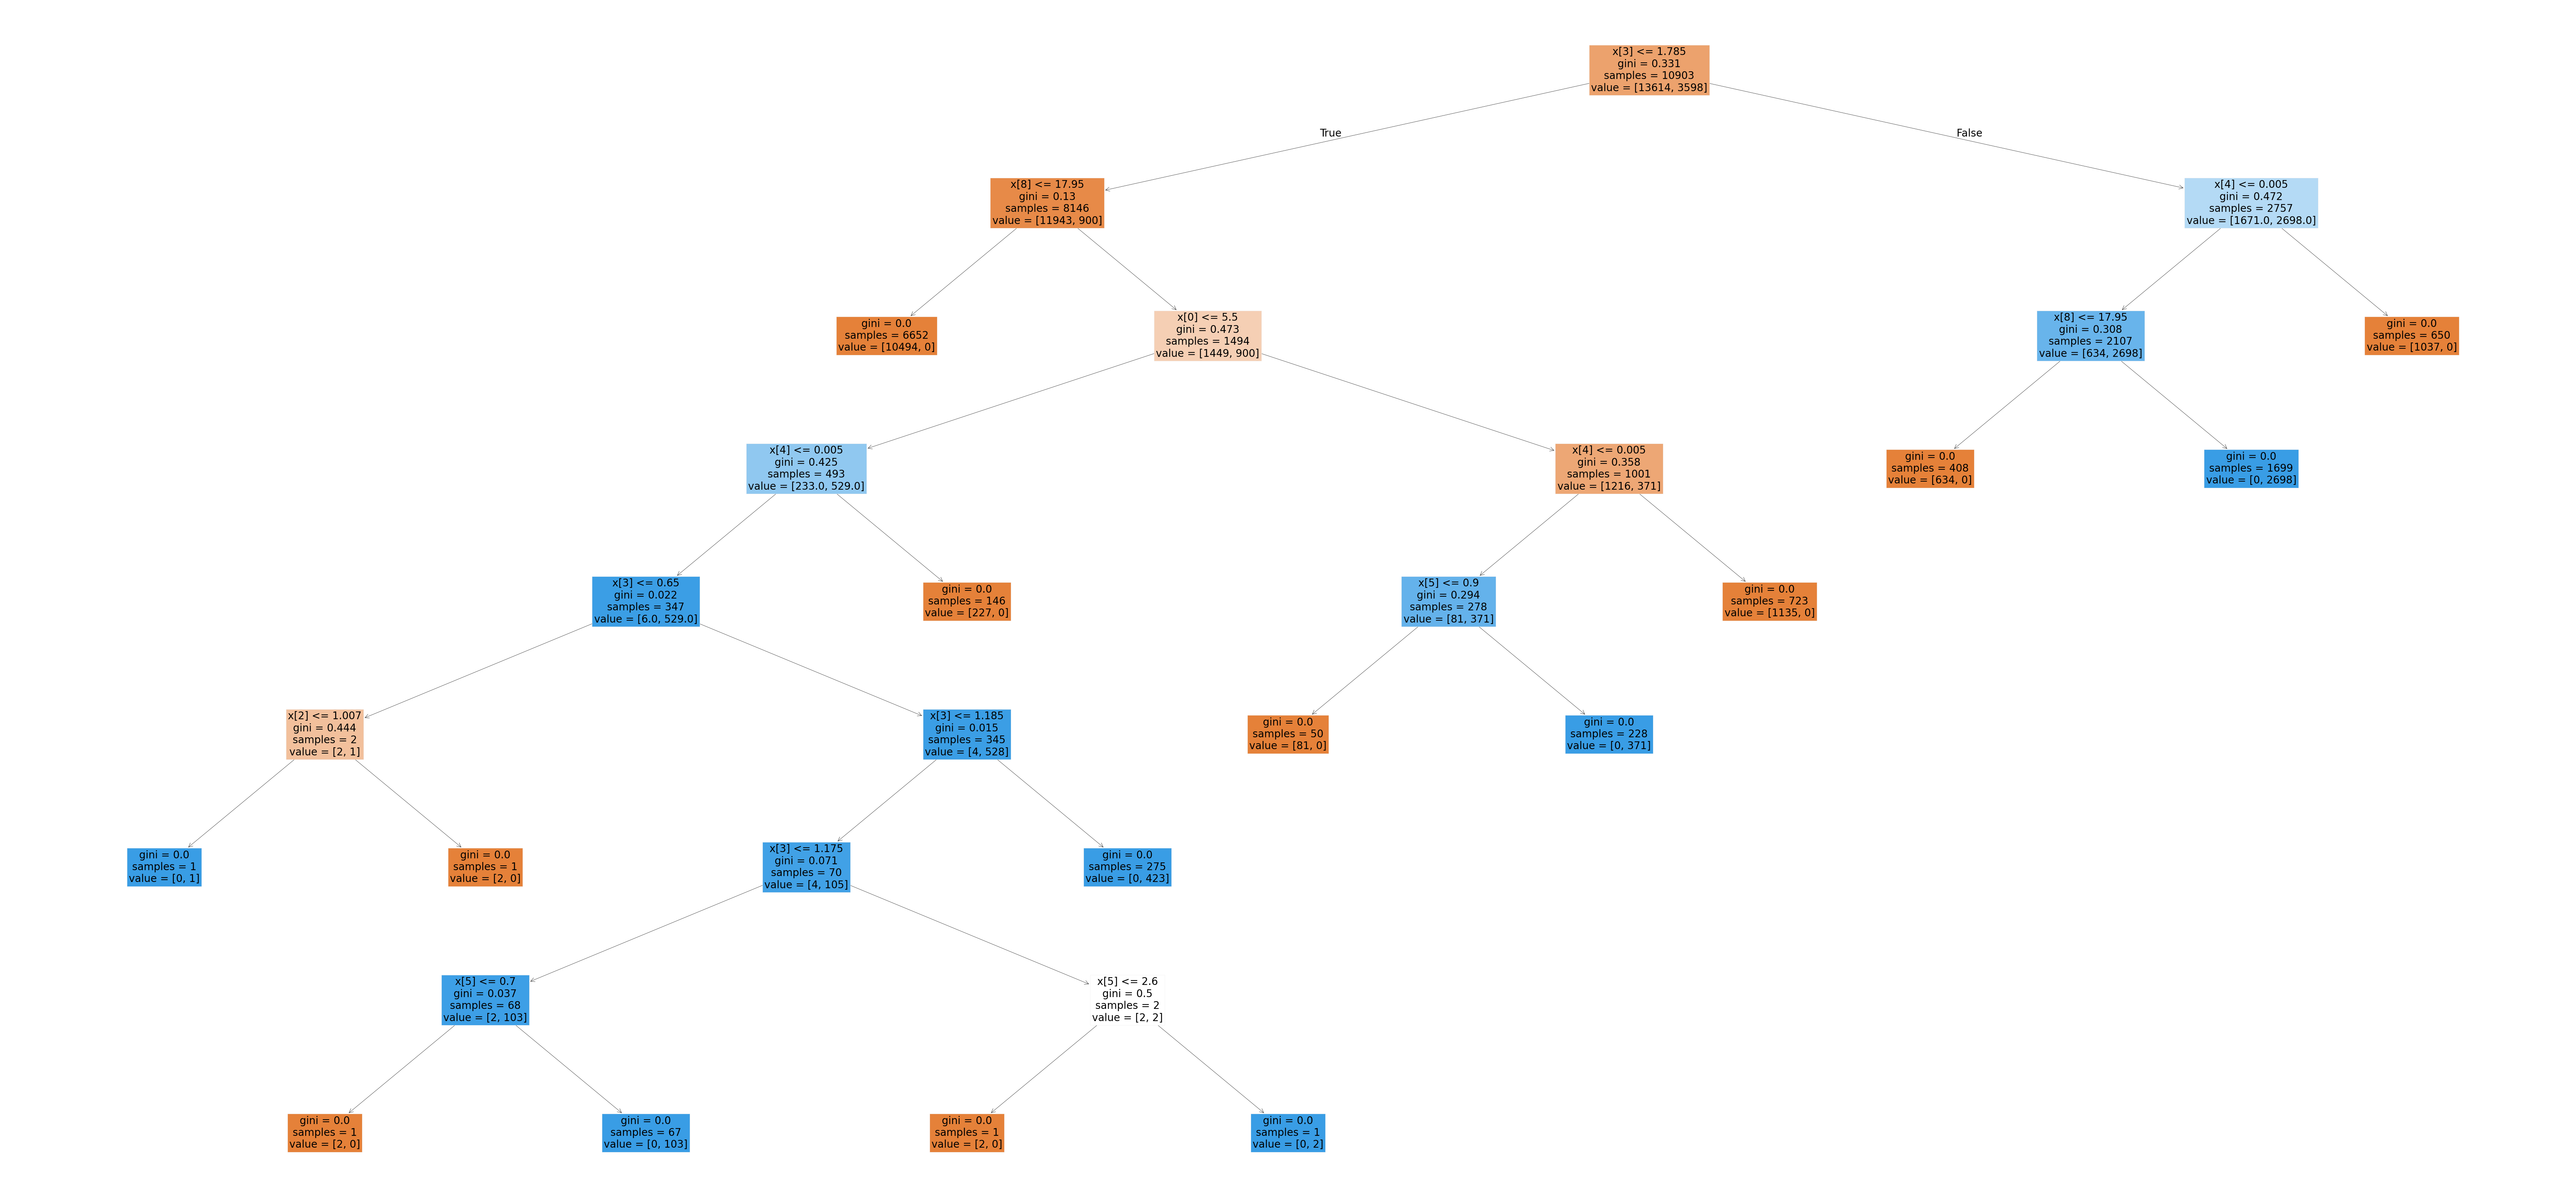

In [159]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True)
plt.show()

In [160]:
fig.savefig(os.path.join(path,'random_forest_maastricht.png'),bbox_inches='tight')

##### Uncovering Feature Importances

In [162]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.03362129, 0.02097753, 0.01204183, 0.1017092 , 0.31070936,
       0.07310863, 0.11038012, 0.0176521 , 0.31979994])

In [163]:
# Retrieve feature importances from the trained model
ma_importance = clf.feature_importances_
print("Feature Importances:", ma_importance)
print(ma_importance.shape)

Feature Importances: [0.03362129 0.02097753 0.01204183 0.1017092  0.31070936 0.07310863
 0.11038012 0.0176521  0.31979994]
(9,)


In [164]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [165]:
# Create a dataframe to associate observation measurements with their importances
ma_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': ma_importance
})

In [166]:
# Sort by importance for chart readability
ma_importance = ma_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(ma_importance)

Feature Importance:
        Measurement  Importance
8          temp_max    0.319800
4     precipitation    0.310709
6         temp_mean    0.110380
3  global_radiation    0.101709
5          sunshine    0.073109
0       cloud_cover    0.033621
1          humidity    0.020978
7          temp_min    0.017652
2          pressure    0.012042


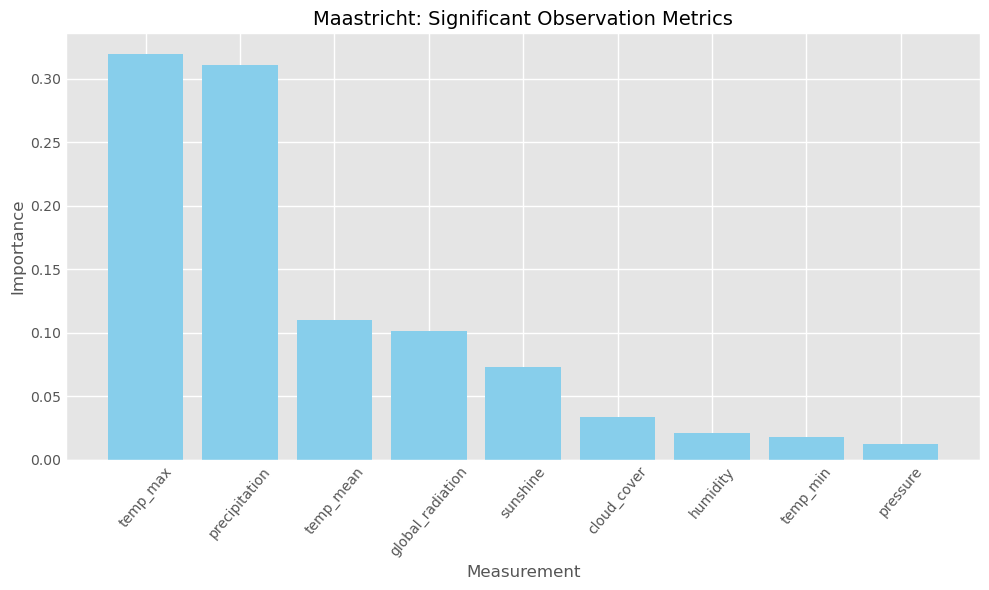

In [167]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(ma_importance['Measurement'], ma_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Maastricht: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()

The most important features for Maastricht are: temp_max, precipitation and temp_mean.